In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option("max_rows", None)

In [2]:
ori_df = pd.read_csv('../data/export.csv')
ori_df.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,19,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,Army Officer,10+ years,MORTGAGE,100000.0,Source Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,782xx,TX,11.30,0.0,Jun-2003,710.0,714.0,0.0,26.0,NaN,6.0,0.0,14087.0,59.9,25.0,w,7667.82,7667.82,2737.930000,2737.93,2332.18,405.75,0.0,0.0,0.0,Aug-2018,304.59,Sep-2018,Aug-2018,714.0,710.0,0.0,26.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75631.0,0.0,2.0,0.0,1.0,20.0,12398.0,53.0,0.0,0.0,14087.0,56.0,23500.0,1.0,2.0,0.0,1.0,12605.0,6413.0,68.7,0.0,0.0,135.0,173.0,104.0,20.0,4.0,145.0,NaN,20.0,NaN,1.0,1.0,1.0,2.0,6.0,11.0,3.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,96.0,50.0,0.0,0.0,119350.0,26485.0,20500.0,23600.

In [3]:
ori_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 151 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          object 
 1   member_id                                   float64
 2   loan_amnt                                   float64
 3   funded_amnt                                 float64
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                  

In [4]:
ori_df.loc[ori_df.funded_amnt > 10000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.00,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,124031429,NaN,25000.0,25000.0,25000.0,60 months,9.44,524.32,B,B1,North Dock Warehouse,10+ years,RENT,77573.00,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,626xx,IL,18.43,0.0,Jul-2002,710.0,714.0,0.0,NaN,NaN,11.0,0.0,28030.0,67.0,16.0,w,21956.61,21956.61,4705.770000,4705.77,3043.39,1662.38,0.0,0.0,0.0,Aug-2018,524.32,Sep-2018,Aug-2018,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,37382.0,0.0,1.0,0.0,0.0,30.0,9352.0,56.0,1.0,1.0,5630.0,67.0,41600.0,0.0,0.0,0.0,1.0,3398.0,4200.0,70.0,0.0,0.0,128.0,184.0,12.0,12.0,0.0,12.0,NaN,NaN,NaN,0.0,8.0,10.0,8.0,8.0,4.0,10.0,12.0,8.0,11.0,NaN,0.0,0.0,1.0,100.0,62.5,0.0,0.0,58213.0

In [5]:
ori_df.term

0         60 months
1         36 months
2         36 months
3         60 months
4         36 months
            ...    
299995    36 months
299996    36 months
299997    36 months
299998          NaN
299999          NaN
Name: term, Length: 300000, dtype: object

In [6]:
ori_df['term (months)'] = ori_df.term.str.extract('(?P<digit>\d+)', expand=False)
ori_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term (months)
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,60
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,Army Officer,10+ years,MORTGAGE,100000.0,Source Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,782xx,TX,11.30,0.0,Jun-2003,710.0,714.0,0.0,26.0,NaN,6.0,0.0,14087.0,59.9,25.0,w,7667.82,7667.82,2737.930000,2737.93,2332.18,405.75,0.0,0.0,0.0,Aug-2018,304.59,Sep-2018,Aug-2018,714.0,710.0,0.0,26.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75631.0,0.0,2.0,0.0,1.0,20.0,12398.0,53.0,0.0,0.0,14087.0,56.0,23500.0,1.0,2.0,0.0,1.0,12605.0,6413.0,68.7,0.0,0.0,135.0,173.0,104.0,20.0,4.0,145.0,NaN,20.0,NaN,1.0,1.0,1.0,2.0,6.0,11.0,3.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,96.0,50.0,0.0,0.0,119350.0,26485

In [7]:
ori_df['emp_lenght (years)'] = ori_df.emp_length.str.extract('(?P<digit>\d+)', expand=False)
ori_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term (months),emp_lenght (years)
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,60,1
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,Army Officer,10+ years,MORTGAGE,100000.0,Source Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,782xx,TX,11.30,0.0,Jun-2003,710.0,714.0,0.0,26.0,NaN,6.0,0.0,14087.0,59.9,25.0,w,7667.82,7667.82,2737.930000,2737.93,2332.18,405.75,0.0,0.0,0.0,Aug-2018,304.59,Sep-2018,Aug-2018,714.0,710.0,0.0,26.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75631.0,0.0,2.0,0.0,1.0,20.0,12398.0,53.0,0.0,0.0,14087.0,56.0,23500.0,1.0,2.0,0.0,1.0,12605.0,6413.0,68.7,0.0,0.0,135.0,173.0,104.0,20.0,4.0,145.0,NaN,20.0,NaN,1.0,1.0,1.0,2.0,6.0,11.0,3.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,96.0,50.0,0

In [8]:
graph = pd.crosstab(ori_df.grade, [ori_df.loan_status])
graph

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,
A,843,52215,0,11302,193,125,297
B,2924,69719,1,16153,630,299,1050
C,4729,59589,7,14197,870,449,1655
D,3389,28117,5,6933,627,319,1233
E,2413,9243,0,3130,243,142,646
F,1124,2420,0,1015,100,55,224
G,365,611,0,283,21,14,75


In [9]:
graph_good_bad = pd.DataFrame()
graph_good_bad['good_loan'] = graph['Charged Off'] + graph['Current'] + graph['Fully Paid']
graph_good_bad['bad_loan'] = graph['Default'] + graph['In Grace Period'] + graph['Late (16-30 days)'] + graph['Late (31-120 days)']
graph_good_bad

,good_loan,bad_loan
grade,,
A,64360,615
B,88796,1980
C,78515,2981
D,38439,2184
E,14786,1031
F,4559,379
G,1259,110


loan_status
Charged Off            15787
Current               221914
Default                   13
Fully Paid             53013
In Grace Period         2684
Late (16-30 days)       1403
Late (31-120 days)      5180
dtype: int64


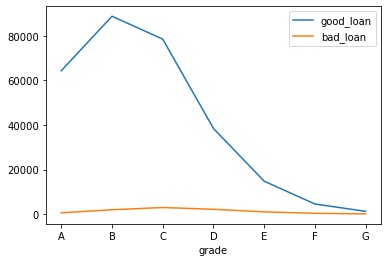

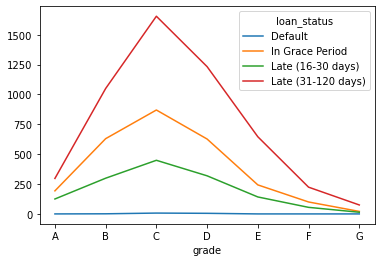

In [10]:
print(graph.sum())
graph.drop(['Charged Off', 'Current', 'Fully Paid'], inplace=True, axis=1)
graph_good_bad.plot()
graph.plot()

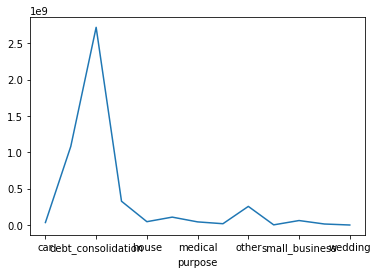

In [11]:
graph = ori_df.groupby('purpose').sum()['loan_amnt']
graph.plot()

In [12]:
good_loan_status = ['Charged Off', 'Current', 'Fully Paid']
# bad_loan_status = ['Default', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']
ori_df['good_bad_loan'] = ori_df['loan_status'].apply(lambda x: 'good' if x in good_loan_status else 'bad')
ori_df[['good_bad_loan', 'loan_status']].head(50)

,good_bad_loan,loan_status
0,good,Current
1,good,Current
2,good,Current
3,good,Current
4,good,Fully Paid
5,good,Current
6,good,Current
7,good,Current
8,good,Current
9,good,Current


In [13]:
ori_df.dropna(subset=['loan_amnt'], inplace=True)

In [14]:
ori_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term (months),emp_lenght (years),good_bad_loan
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,60,1,good
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,Army Officer,10+ years,MORTGAGE,100000.0,Source Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,782xx,TX,11.30,0.0,Jun-2003,710.0,714.0,0.0,26.0,NaN,6.0,0.0,14087.0,59.9,25.0,w,7667.82,7667.82,2737.930000,2737.93,2332.18,405.75,0.0,0.0,0.0,Aug-2018,304.59,Sep-2018,Aug-2018,714.0,710.0,0.0,26.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75631.0,0.0,2.0,0.0,1.0,20.0,12398.0,53.0,0.0,0.0,14087.0,56.0,23500.0,1.0,2.0,0.0,1.0,12605.0,6413.0,68.7,0.0,0.0,135.0,173.0,104.0,20.0,4.0,145.0,NaN,20.0,NaN,1.0,1.0,1.0,2.0,6.0,11.0,3.0,9.0,1.0,6.0,0.0,0.0,

In [15]:
pd.set_option("max_rows", None)

In [16]:
ori_df.isna().sum()

id                                                 0
member_id                                     299994
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      23388
emp_length                                     23089
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [17]:
pd.set_option('max_rows', 100)

In [18]:
ori_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,term (months),emp_lenght (years),good_bad_loan
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,Project Engineer,< 1 year,RENT,73000.0,Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,063xx,CT,21.50,0.0,Sep-2010,675.0,679.0,2.0,NaN,NaN,9.0,0.0,14914.0,44.0,12.0,w,12747.73,12747.73,2872.660000,2872.66,1652.27,1220.39,0.0,0.0,0.0,Aug-2018,320.25,Sep-2018,Aug-2018,634.0,630.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,105265.0,0.0,3.0,1.0,1.0,8.0,90351.0,109.0,0.0,3.0,7715.0,44.0,33700.0,0.0,0.0,1.0,4.0,11696.0,4500.0,82.0,0.0,0.0,86.0,43.0,15.0,8.0,0.0,16.0,NaN,0.0,NaN,0.0,4.0,6.0,7.0,7.0,3.0,6.0,9.0,5.0,9.0,NaN,0.0,0.0,1.0,100.0,75.0,0.0,0.0,116705.0,105265.0,18000.0,83005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,60,1,good
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,Army Officer,10+ years,MORTGAGE,100000.0,Source Verified,Nov-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,782xx,TX,11.30,0.0,Jun-2003,710.0,714.0,0.0,26.0,NaN,6.0,0.0,14087.0,59.9,25.0,w,7667.82,7667.82,2737.930000,2737.93,2332.18,405.75,0.0,0.0,0.0,Aug-2018,304.59,Sep-2018,Aug-2018,714.0,710.0,0.0,26.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,75631.0,0.0,2.0,0.0,1.0,20.0,12398.0,53.0,0.0,0.0,14087.0,56.0,23500.0,1.0,2.0,0.0,1.0,12605.0,6413.0,68.7,0.0,0.0,135.0,173.0,104.0,20.0,4.0,145.0,NaN,20.0,NaN,1.0,1.0,1.0,2.0,6.0,11.0,3.0,9.0,1.0,6.0,0.0,0.0,

In [19]:
ori_df[['dti', 'dti_joint']].head(10)

,dti,dti_joint
0,21.50,NaN
1,11.30,NaN
2,23.49,NaN
3,18.43,NaN
4,6.17,NaN
5,14.18,NaN
6,17.42,17.38
7,17.53,NaN
8,11.90,NaN
9,1.33,NaN


In [20]:
ori_df['dti_acc'] = np.where(ori_df['dti_joint'].notna(), ori_df['dti_joint'], ori_df['dti'])
ori_df[['dti', 'dti_joint', 'dti_acc']].head(50)

,dti,dti_joint,dti_acc
0,21.50,NaN,21.50
1,11.30,NaN,11.30
2,23.49,NaN,23.49
3,18.43,NaN,18.43
4,6.17,NaN,6.17
5,14.18,NaN,14.18
6,17.42,17.38,17.38
7,17.53,NaN,17.53
8,11.90,NaN,11.90
9,1.33,NaN,1.33
